<a href="https://colab.research.google.com/github/youiba/Language_Modeling_Using_LSTM/blob/main/Language_Modeling_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
from google.colab import files
upload = files.upload()

Saving p&p dataset.txt to p&p dataset (2).txt


In [ ]:
file = open("p&p dataset.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]





















'The Project Gutenberg eBook of Pride and prejudice, by Jane Austen This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using th'

In [ ]:
len(data)

733811

Step 4: Apply tokenization and some other changes

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

In [ ]:
# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 182, 164, 1001, 3, 299, 4, 946, 30, 72, 710, 41, 1001, 23, 21]

In [ ]:
len(sequence_data)

131231

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

7248


In [ ]:
sequences = []

In [ ]:
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

In [ ]:
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  131228


array([[   1,  182,  164, 1001],
       [ 182,  164, 1001,    3],
       [ 164, 1001,    3,  299],
       [1001,    3,  299,    4],
       [   3,  299,    4,  946],
       [ 299,    4,  946,   30],
       [   4,  946,   30,   72],
       [ 946,   30,   72,  710],
       [  30,   72,  710,   41],
       [  72,  710,   41, 1001]])

In [ ]:
X = []
y = []

In [ ]:

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)



In [ ]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1  182  164]
 [ 182  164 1001]
 [ 164 1001    3]
 [1001    3  299]
 [   3  299    4]
 [ 299    4  946]
 [   4  946   30]
 [ 946   30   72]
 [  30   72  710]
 [  72  710   41]]
Response:  [1001    3  299    4  946   30   72  710   41 1001]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Step 5: Creating the model

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             72480     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 7248)              7255248   
                                                                 
Total params: 20,376,728
Trainable params: 20,376,728
Non-trainable params: 0
_________________________________________________________________


Step 6: Plot the model

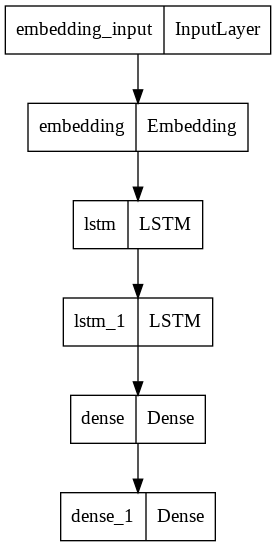

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

Step 7: Train the model


In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=40, batch_size=64, callbacks=[checkpoint])


Epoch 1/40
2050/2051 [============================>.] - ETA: 0s - loss: 6.2075
Epoch 1: loss improved from inf to 6.20738, saving model to next_words.h5
2051/2051 [==============================] - 39s 15ms/step - loss: 6.2074
Epoch 2/40
2050/2051 [============================>.] - ETA: 0s - loss: 5.5933
Epoch 2: loss improved from 6.20738 to 5.59319, saving model to next_words.h5
2051/2051 [==============================] - 32s 16ms/step - loss: 5.5932
Epoch 3/40
2049/2051 [============================>.] - ETA: 0s - loss: 5.2759
Epoch 3: loss improved from 5.59319 to 5.27591, saving model to next_words.h5
2051/2051 [==============================] - 32s 15ms/step - loss: 5.2759
Epoch 4/40
2049/2051 [============================>.] - ETA: 0s - loss: 5.0505
Epoch 4: loss improved from 5.27591 to 5.05061, saving model to next_words.h5
2051/2051 [==============================] - 31s 15ms/step - loss: 5.0506
Epoch 5/40
2051/2051 [==============================] - ETA: 0s - loss: 4.8430
E

Step 8: Let's predict


In [ ]:
from keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model("next_words.h5")
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

['You', 'may', 'copy']
1/1 [==============================] - 1s 926ms/step
it
['You', 'may', 'copy']
1/1 [==============================] - 0s 16ms/step
it
['If', 'you', 'are']
1/1 [==============================] - 0s 17ms/step
not
['START', 'OF', 'THE']
1/1 [==============================] - 0s 19ms/step
project
['what', 'is', 'the']
1/1 [==============================] - 0s 18ms/step
good
Enter your line: 0
Execution completed.....
